# Linear model with Random Parameter search
-------------------------------------------------------------------------------------------------------------------
This notebook uses an example to create a linear model for the cart-pole task. The parameters of the linear model are searched for randomly (from a uniform distribution). We are able to do such random sampling for this task only because this is a relatively simpler task. We cannot do the same thing for other tasks.

In [1]:
# obtain all the imports
import numpy as np 
import gym
import matplotlib.pyplot as plt

import time # to induce slight sleep

%matplotlib inline

Define the function to obtain the action given the observation and the parameters theta

In [2]:
def get_action(obs, thetas):
    """
        obtain an action based on the current observation (state) and the linear learned theta parameters
        @args
            obs: current state of the environment
            thetas: parameters of the linear model
            
        @return
            action: 0 for moving cart left and 1 for right
    """
    # obtain the value for decision making
    value = np.dot(obs, thetas)
    
    # step function for making 
    if value >= 0:
        action = 1
    else:
        action = 0

    # return the value of the acquired action
    return action

Now perform the random search over the parameter space to find good parameters for the linear model

In [3]:
def get_model(search_range=10, feedback=True):
    """
        perform constrained random search over the parameter space for a linear model to solve the task
        @args 
            environment: cart-Pole environment from the gym
            search_range: values will be drawn from the uniform distribution over [-search_range, search_range]
            feedback: whether to print the performance as the search progresses
        @return
            thetas: parameter vector for the linear model
    """
    # create the environment for the search
    environment = gym.make('CartPole-v0')
    
    # start by defining a helper method to check if the model is good enough
    def is_good_enough(model, no_of_episodes=100, threshold=195):
        """
            check if the current model is good enough given the environment
            @args
                model: parameter vector for the linear model
                no_of_episodes: number of episodes to average over
                threshold: minimun avg reward required to qualify as a good model
                           The default value of the threshold is 195 
                           refer the gym_environment for the task solved condition
            @return
                status: boolean denoting if the model is good enough
                avg_reward: average reward obtained using the given model
        """
        
        rewards_list = []  # list to accumulate the rewards obtained during the episode

        for _ in range(no_of_episodes):
            obs = environment.reset()
            total_reward = 0  # initialize total reward to 0

            # start the episode loop
            done = False
            while not done:
                action = get_action(obs, model)
                obs, reward, done, _ = environment.step(action)

                # accumulate the total_reward
                total_reward += reward

            # add the total reward to the rewards_list
            rewards_list.append(total_reward)

        # check if the model's average reward is greater or equal to the threshold
        avg_reward = np.mean(rewards_list)

        return avg_reward >= threshold, avg_reward

    # create a performances list
    performances_list = []
    model_shape = environment.observation_space.shape
    
    # start the random search loop:
    done = False
    count = 1
    while not done:
        thetas = np.random.uniform(low=-search_range, high=search_range, size=model_shape)
        done, pmnce = is_good_enough(thetas)
        performances_list.append(pmnce)
        
        if feedback:
            print("Finished %d runs. obtained performance: %.3f" %(count, pmnce))
        
        count += 1
    # display a graph of the performances obtained over the search
    plt.plot(performances_list)
    
    # close the environment and delete the handle
    environment.close()
    del environment
    
    # return the final good model
    return thetas

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Finished 1 runs. obtained performance: 9.030
Finished 2 runs. obtained performance: 32.300
Finished 3 runs. obtained performance: 46.200
Finished 4 runs. obtained performance: 9.270
Finished 5 runs. obtained performance: 156.330
Finished 6 runs. obtained performance: 9.280
Finished 7 runs. obtained performance: 9.490
Finished 8 runs. obtained performance: 134.430
Finished 9 runs. obtained performance: 8.920
Finished 10 runs. obtained performance: 128.000
Finished 11 runs. obtained performance: 9.640
Finished 12 runs. obtained performance: 8.920
Finished 13 runs. obtained performance: 9.550
Finished 14 runs. obtained performance: 49.880
Finished 15 runs. obtained performance: 121.590
Finished 16 runs. obtained performance: 38.800
Finished 17 runs. obtained performance: 8.960
Finished 18 runs. obtained performance: 10.020
Finished 19 runs. obtained performance: 161.100
Finished 20 runs. obt

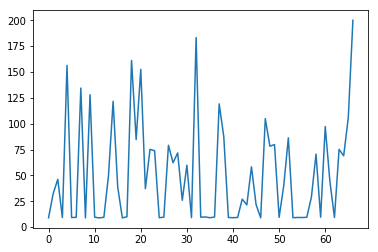

In [4]:
# run the random search
best_model = get_model()

We can notice how fast the random search finds a good model. Although sometimes it takes a long time, but on an average, the random search algorithm finds a good model very easily

## Demonstrate how well the random model performs:

In [17]:
# function to play an episode using the given model:
def play_episode(model, ignore_done_signal=False, max_steps=500):
    """
        play and render the episode
        @args
            model: linear model   
        @returns 
            None
    """
    # create the cartPole environment
    environment = gym.make('CartPole-v0')
    
    # reset the environment and obtain the initial observation
    obs = environment.reset()
    done = False
    
    count = 0
    while not done and count < max_steps:
        environment.render()
        obs, _, done, _ = environment.step(get_action(obs, model))
        
        if ignore_done_signal:
            done = False
        
        count += 1
        
    # wait 1 secs before closing the environment window
    time.sleep(1)
    environment.close()

play an episode with a random model to see how bad it performs:

In [50]:
random_model = np.random.uniform(-100, 100, (4,))
play_episode(random_model, ignore_done_signal=True, max_steps=200)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


As can be observed, it didn't last even 20 steps I suppose

Now run the best model

In [70]:
play_episode(best_model, ignore_done_signal=True, max_steps=500)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


The best model does quite good.

# I hope this notebook helped